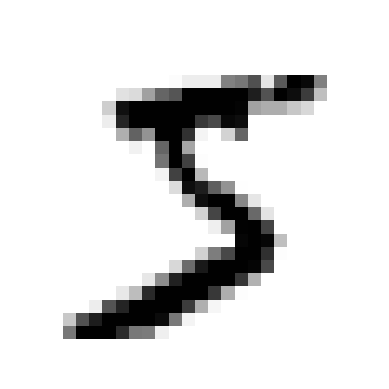

5


In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib


mnist = fetch_openml('mnist_784',version=1)
x = mnist.data
y = mnist.target
x_somedigit = x.iloc[0]
x_someimage = x_somedigit.values.reshape(28,28)
plt.imshow(x_someimage,cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
print(y[0])


In [2]:
import numpy as np
x_train , y_train , x_test  , y_test = x[:60000] , y[:60000] , x[60000:] , y[60000:]

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [3]:
#Trainig a binary classifier
y_train_5 = (y_train == '5') #Eha target values haru true ra false ma convcert bhako cha
y_test_5 = (y_test == '5') #Tehi same kaam tara test set ma


In [4]:
from sklearn.linear_model import SGDClassifier
hero = SGDClassifier(random_state=42)
hero.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [5]:
hero.predict([x_somedigit])

c:\Users\TRITON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(hero , x_train , y_train_5, cv =3 , scoring="accuracy", n_jobs=-1)

array([0.95935, 0.96375, 0.96465])

In [7]:
# Confusion Matrix 

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(hero, x_train , y_train_5, cv=3 , n_jobs=-1)


In [8]:
from sklearn.metrics import confusion_matrix, precision_score , recall_score
confusion_matrix(y_train_5, y_train_pred)
preciosn = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

In [9]:
y_scores = cross_val_predict(hero, x_train , y_train_5, cv=3 , method="decision_function", n_jobs=-1)

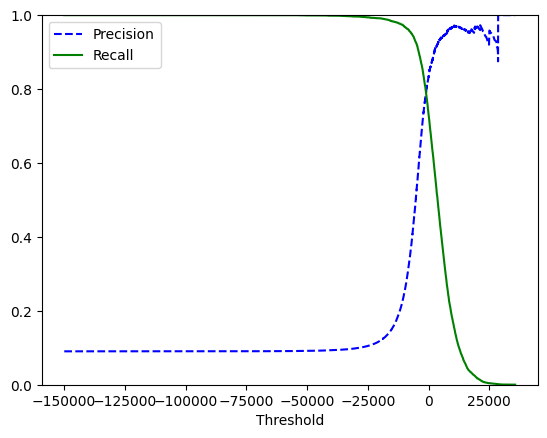

In [10]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt 

precisions , recalls , threshold = precision_recall_curve(y_train_5,y_scores)
plt.plot(threshold, precisions[:-1], "b--", label="Precision")
plt.plot(threshold, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()


In [11]:
#Multiclass classification
hero.fit(x_train , y_train)


SGDClassifier(random_state=42)

In [12]:
hero.predict([x_somedigit])

c:\Users\TRITON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype='<U1')

In [13]:
some_digit_decision = hero.decision_function([x_somedigit])
some_digit_decision

c:\Users\TRITON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-14531.87055408, -32515.69173316, -14325.79473048,
          -473.7212639 , -22909.14554835,   3000.88691059,
        -26857.48258368,  -8687.92651179,  -8647.07093482,
        -15515.59271829]])

In [14]:
np.argmax(some_digit_decision)

5

In [15]:
hero.classes_


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(hero , x_train , y_train, cv=3 , n_jobs=-1)

array([0.85395, 0.8766 , 0.88   ])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))


In [18]:
cross_val_score(hero , x_train_scaled , y_train , cv =3 , n_jobs=-1, scoring="accuracy")

array([0.90365, 0.8978 , 0.8958 ])

In [19]:
y_train_pred = cross_val_predict(hero, x_train_scaled , y_train , cv = 3, n_jobs=-1)
y_train_pred

array(['5', '3', '4', ..., '3', '8', '9'], dtype='<U1')

In [20]:
confs = confusion_matrix(y_train , y_train_pred)
confs

array([[5583,    0,   18,    7,    7,   41,   36,    6,  225,    0],
       [   1, 6414,   43,   22,    3,   42,    4,   10,  192,   11],
       [  26,   26, 5257,   79,   73,   22,   68,   35,  366,    6],
       [  27,   24,  114, 5229,    1,  196,   24,   44,  416,   56],
       [  11,   16,   40,    7, 5232,    9,   36,   22,  316,  153],
       [  30,   19,   25,  143,   54, 4487,   78,   16,  508,   61],
       [  28,   18,   45,    1,   37,   92, 5546,    9,  142,    0],
       [  21,   14,   49,   24,   51,   14,    4, 5694,  191,  203],
       [  18,   61,   42,   85,    2,  133,   34,    9, 5428,   39],
       [  24,   21,   28,   57,  125,   38,    1,  179,  401, 5075]],
      dtype=int64)

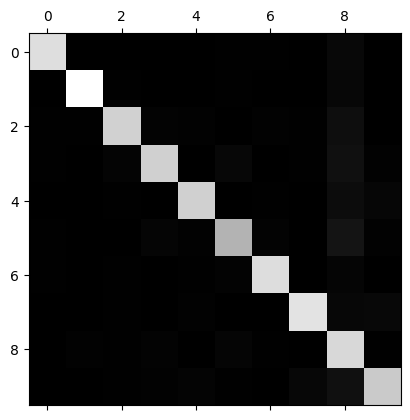

In [21]:
plt.matshow(confs , cmap = plt.cm.gray)
plt.show()

In [22]:
row_sum = confs.sum(axis=1 , keepdims = True)
norm_hero = confs/row_sum
np.fill_diagonal(norm_hero , 0)

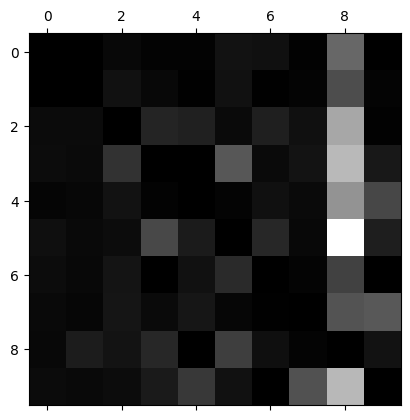

In [23]:
plt.matshow(norm_hero , cmap = plt.cm.gray)
plt.show()

In [24]:
x_a , x_b = '3' , '5'

x_aa = x_train[(y_train == x_a) | (y_train == x_a)]
x_ab = x_train[(y_train == x_a) | (y_train == x_b)]
x_bb = x_train[(y_train == x_b) | (y_train == x_b)]
x_ba = x_train[(y_train == x_b) | (y_train == x_a)]

In [25]:
def plot_digits(X, y, digit, images_per_row=5, num_rows=5):
    digit_indices = np.where(y == digit)[0]
    num_images = images_per_row * num_rows
    selected_indices = np.random.choice(digit_indices, num_images, replace=False)
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(10, 10))
    fig.suptitle(f'Handwritten variations of digit: {digit}', fontsize=16)
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[selected_indices[i]], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier


y_train_int = y_train.astype(np.int8)

y_train_large = (y_train_int >= 7)
y_train_odd = (y_train_int % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd] 

hero_1 = KNeighborsClassifier()
hero_1.fit(x_train, y_multilabel)

print(hero_1.predict([x_somedigit]))
print(y_train[0])


c:\Users\TRITON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[[False  True]]
5


In [ ]:
from sklearn.metrics import f1_score
y_pred_multi = cross_val_predict(hero_1 , x_train , y_multilabel, cv=3 , n_jobs=-1)
f1_score(y_multilabel , y_pred_multi , average="macro")

In [ ]:
#multioutput classification
noise_train = np.random.randint( 0 ,100 ,(len(x_train), 784))
noise_test = np.random.randint( 0 ,100 ,(len(x_test), 784))
x_train_noisy = x_train + noise_train
x_test_noisy = x_test + noise_test
y_train_mod = x_train
y_test_mod = x_test

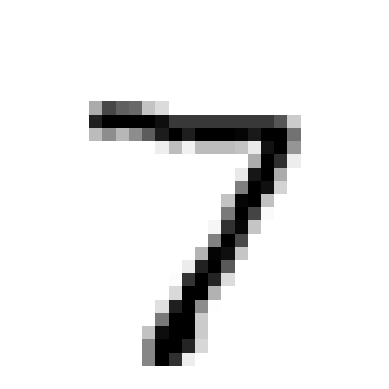

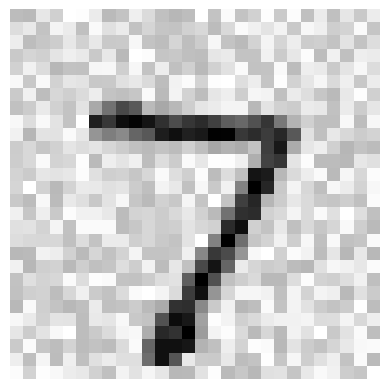

In [59]:
immage = x_test_noisy.iloc[0].values.reshape(28,28)
image_1 = x_test.iloc[0].values.reshape(28,28)
plt.imshow(image_1 , cmap=matplotlib.cm.binary , interpolation='nearest')
plt.axis('off')
plt.show()
plt.imshow(immage,  cmap=matplotlib.cm.binary , interpolation='nearest')
plt.axis('off')
plt.show()

In [60]:
hero_1.fit(x_train_noisy , y_train_mod)


KNeighborsClassifier()

c:\Users\TRITON\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


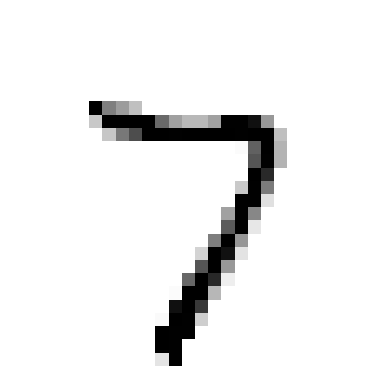

In [61]:
clean_image = hero_1.predict([x_test_noisy.iloc[0]])
clean = clean_image.reshape(28,28)
plt.imshow(clean , cmap=matplotlib.cm.binary , interpolation='nearest')
plt.axis('off')
plt.show()